In [1]:
%reset -f
import pickle
# Load the model file
with open('md.model', 'rb') as f:
    agent_parameters = pickle.load(f)

# Check the keys and structure of the loaded model
print(agent_parameters.keys())

# Viewing the structure of the network arguments
policy_kwargs = agent_parameters["model"]["args"]["net"]["args"]
pi_head_kwargs = agent_parameters["model"]["args"]["pi_head_opts"]

print("Policy Network Arguments:")
print(policy_kwargs)

print("\nPolicy Head Arguments:")
print(pi_head_kwargs)

from MCagent import MineRLAgent
import gym
from torchsummary import summary
import torch

# Initialize the agent with loaded parameters
agent = MineRLAgent(policy_kwargs=policy_kwargs, pi_head_kwargs=pi_head_kwargs)
model = agent.policy
# print(model)



# model = model.to("cuda")

# summary(model, (3, 360, 640))

with open('all_observation.pkl', 'rb') as f:
    obss = pickle.load(f)
obss = obss.squeeze(1)

agent_input = [agent._env_obs_to_agent(ob[None]) for ob in obss]


dict_keys(['version', 'model', 'extra_args'])
Policy Network Arguments:
{'active_reward_monitors': {'craft_stats': {'args': {'collapse_var': True, 'items': ['planks', 'stick', 'crafting_table', 'wooden_pickaxe', 'stone_pickaxe', 'furnace', 'iron_ingot', 'iron_pickaxe', 'diamond_pickaxe', 'torch']}, 'weight': 0}, 'mine_stats': {'args': {'collapse_var': True, 'items': ['log', 'coal_ore', 'stone', 'iron_ore', 'diamond_ore', 'obsidian']}, 'weight': 0}, 'order_invariant_curriculum': {'args': {'curriculum': {'coal': [5, 0.4], 'cobblestone': [11, 0.09090909090909091], 'crafting_table': [1, 1], 'diamond': [10000, 2.6666666666666665], 'diamond_pickaxe': [10000, 8], 'furnace': [1, 1], 'iron_ingot': [3, 1.3333333333333333], 'iron_ore': [3, 1.3333333333333333], 'iron_pickaxe': [1, 4], 'log': [8, 0.125], 'obsidian': [10000, 16], 'planks': [20, 0.05], 'stick': [16, 0.0625], 'stone_pickaxe': [1, 1], 'torch': [16, 0.125], 'wooden_pickaxe': [1, 1]}}, 'weight': 1}, 'pickup_stats': {'args': {'collapse_va

k:\ME\CMU\Robot Learning\MCRL\MC_PPO\lib\torch_util.py:36: UserWarning: 'has_cuda' is deprecated, please use 'torch.backends.cuda.is_built()'
  return th.has_cuda


+++++++++++++++ obs after reshape torch.Size([1, 128, 128, 3]) +++++++++++++++
+++++++++++++++ obs after reshape torch.Size([1, 128, 128, 3]) +++++++++++++++
+++++++++++++++ obs after reshape torch.Size([1, 128, 128, 3]) +++++++++++++++
+++++++++++++++ obs after reshape torch.Size([1, 128, 128, 3]) +++++++++++++++
+++++++++++++++ obs after reshape torch.Size([1, 128, 128, 3]) +++++++++++++++
+++++++++++++++ obs after reshape torch.Size([1, 128, 128, 3]) +++++++++++++++
+++++++++++++++ obs after reshape torch.Size([1, 128, 128, 3]) +++++++++++++++
+++++++++++++++ obs after reshape torch.Size([1, 128, 128, 3]) +++++++++++++++
+++++++++++++++ obs after reshape torch.Size([1, 128, 128, 3]) +++++++++++++++
+++++++++++++++ obs after reshape torch.Size([1, 128, 128, 3]) +++++++++++++++
+++++++++++++++ obs after reshape torch.Size([1, 128, 128, 3]) +++++++++++++++
+++++++++++++++ obs after reshape torch.Size([1, 128, 128, 3]) +++++++++++++++
+++++++++++++++ obs after reshape torch.Size([1, 128

In [2]:
pd, vpred, _ = agent.policy.get_output_for_observation(agent_input[0], agent.hidden_state, agent._dummy_first)



****************** obs shape for model after layer1 torch.Size([1, 1, 128, 128, 3]) *******************




****************** obs shape for model after layer2 torch.Size([1, 1, 2048]) *******************


prev shape: torch.Size([1, 128, 2048]), new shape: torch.Size([1, 1, 2048]), startfull: 0
prev shape: torch.Size([1, 128, 2048]), new shape: torch.Size([1, 1, 2048]), startfull: 0
bias shape: torch.Size([16, 1, 129])
extra_btT shape: torch.Size([16, 1, 129])
prev shape: torch.Size([1, 128, 2048]), new shape: torch.Size([1, 1, 2048]), startfull: 0
prev shape: torch.Size([1, 128, 2048]), new shape: torch.Size([1, 1, 2048]), startfull: 0
bias shape: torch.Size([16, 1, 129])
extra_btT shape: torch.Size([16, 1, 129])
prev shape: torch.Size([1, 128, 2048]), new shape: torch.Size([1, 1, 2048]), startfull: 0
prev shape: torch.Size([1, 128, 2048]), new shape: torch.Size([1, 1, 2048]), startfull: 0
bias shape: torch.Size([16, 1, 129])
extra_btT shape: torch.Size([16, 1, 129])
prev shape: to

In [3]:
%reset -f
import pickle
with open('action_buffer.pkl', 'rb') as f:
    action_buffer = pickle.load(f)

all([isinstance(a, dict) for a in action_buffer])

True

In [1]:
act_buf = [[]]*1024

In [8]:
a = torch.tensor([[ 0.0569, -0.2475,  0.0737, -0.3429],
        [-0.2993,  0.9138,  0.9337, -1.6864],
        [ 0.1132,  0.7892, -0.1003,  0.5688],
        [ 0.3637, -0.9906, -0.4752, -1.5197]])

torch.sum(a)

tensor(-1.8489)

In [1]:
import minerl
import os

minerl_path = os.path.dirname(minerl.__file__)
print(minerl_path)


C:\Users\yhttmb\AppData\Roaming\Python\Python310\site-packages\minerl


In [ ]:
# print all xml file path under this directory "C:\Users\yhttmb\AppData\Roaming\Python\Python310\site-packages\minerl"
import minerl
import os

minerl_path = os.path.dirname(minerl.__file__)
print(minerl_path)

for root, dirs, files in os.walk(minerl_path):
    for file in files:
        if file.endswith(".xml"):
            print(os.path.join(root, file))
            print(file)

C:\Users\yhttmb\AppData\Roaming\Python\Python310\site-packages\minerl\herobraine\env_specs\test\navigation.xml
navigation.xml
C:\Users\yhttmb\AppData\Roaming\Python\Python310\site-packages\minerl\herobraine\env_specs\test\navigationDense.xml
navigationDense.xml
C:\Users\yhttmb\AppData\Roaming\Python\Python310\site-packages\minerl\herobraine\env_specs\test\navigationDenseFixedMap.xml
navigationDenseFixedMap.xml
C:\Users\yhttmb\AppData\Roaming\Python\Python310\site-packages\minerl\herobraine\env_specs\test\navigationExtreme.xml
navigationExtreme.xml
C:\Users\yhttmb\AppData\Roaming\Python\Python310\site-packages\minerl\herobraine\env_specs\test\navigationExtremeDense.xml
navigationExtremeDense.xml
C:\Users\yhttmb\AppData\Roaming\Python\Python310\site-packages\minerl\herobraine\env_specs\test\obtainDebug.xml
obtainDebug.xml
C:\Users\yhttmb\AppData\Roaming\Python\Python310\site-packages\minerl\herobraine\env_specs\test\obtainDebugDense.xml
obtainDebugDense.xml
C:\Users\yhttmb\AppData\Roamin

In [ ]:
import gym
import minerl

env = gym.make("Tree-v0")
obs = env.reset()

done = False
for _ in range(100):
    ac = env.action_space.noop()
    # Spin around to see what is around us
    ac["camera"] = [0, 3]
    print(ac)
    obs, reward, done, info = env.step(ac)
    # env.render()
env.close()

<Mission xmlns="http://ProjectMalmo.microsoft.com">
    <About>
        <Summary>Tree-v0</Summary>
    </About>

    <ModSettings>
        <MsPerTick>50</MsPerTick>
    </ModSettings>

    <ServerSection>
        <ServerInitialConditions>
            <!-- Initial Conditions -->

            
            <Time>
                   
                   <AllowPassageOfTime>true</AllowPassageOfTime>
                </Time>

            
            <AllowSpawning>true</AllowSpawning>

            

        </ServerInitialConditions>
        <ServerHandlers>

            
            <FlatWorldGenerator forceReset="true" generatorString="3;7,2x3,2;1;village"/>

            

            

            
            <ServerQuitWhenAnyAgentFinishes/>

            


        </ServerHandlers>
    </ServerSection>


    
    <AgentSection mode="Survival">
        <Name>MineRLAgent0</Name>

        <AgentStart>

            
            <LowLevelInputs>true</LowLevelInputs>

            
           

In [20]:
import pickle
from collections import OrderedDict
import time
import timeit

with open('all_observations.pkl', 'rb') as f:
    all_observations = pickle.load(f)
obs = all_observations[0]

def split_obs(obs):
    num_envs = obs["pov"].shape[0]
    obervations = []
    for i in range(num_envs):
        single_observation = OrderedDict({
            "inventory": {key: value[i] for key, value in obs["inventory"].items()},
            "pov": obs["pov"][i]
        })
        obervations.append(single_observation)
    return obervations

def split_obs2(obs):
    num_envs = obs["pov"].shape[0]
    inventory = obs["inventory"]
    pov = obs["pov"]
    inventory_splits = [
        {key: value[i] for key, value in inventory.items()}
        for i in range(num_envs)
    ]
    return [
        OrderedDict({
            "inventory": inventory_splits[i],
            "pov": pov[i]
        })
        for i in range(num_envs)
    ]


def test_method1():
    split_obs(obs)  # Replace with your method

def test_method2():
    split_obs2(obs)  # Replace with your method
# print(obs['pov'].shape)
time1 = timeit.timeit(test_method1, number=10000)  # Run 100 iterations
time2 = timeit.timeit(test_method2, number=10000)  # Run 100 iterations

print(f"Method 1 average time: {time1 / 100:.6f} seconds per run")
print(f"Method 2 average time: {time2 / 100:.6f} seconds per run")

Method 1 average time: 0.019116 seconds per run
Method 2 average time: 0.019114 seconds per run


In [50]:
with open('action_from_model.pkl', 'rb') as f:
    actions = pickle.load(f)
print(actions[0].keys())
print(f"Number of keys in actions[0]: {len(actions[0].keys())}")

with open('merged_action.pkl', 'rb') as f:
    merged_action = pickle.load(f)
# print(type(merged_action['camera'][0]))
# print(merged_action['camera'][0])

with open('sample_action.pkl', 'rb') as f:
    sample_action = pickle.load(f)
# print(type(sample_action['camera'][0]))
print(sample_action.keys())
print(f"Number of keys in sample_action: {len(sample_action.keys())}")
print(sample_action)
# print(split_obs(sample_action)[0])


dict_keys(['attack', 'back', 'forward', 'jump', 'left', 'right', 'sneak', 'sprint', 'use', 'drop', 'inventory', 'hotbar.1', 'hotbar.2', 'hotbar.3', 'hotbar.4', 'hotbar.5', 'hotbar.6', 'hotbar.7', 'hotbar.8', 'hotbar.9', 'camera'])
Number of keys in actions[0]: 21
odict_keys(['ESC', 'attack', 'back', 'camera', 'drop', 'forward', 'hotbar.1', 'hotbar.2', 'hotbar.3', 'hotbar.4', 'hotbar.5', 'hotbar.6', 'hotbar.7', 'hotbar.8', 'hotbar.9', 'inventory', 'jump', 'left', 'pickItem', 'right', 'sneak', 'sprint', 'swapHands', 'use'])
Number of keys in sample_action: 24
OrderedDict([('ESC', [0, 0]), ('attack', [0, 0]), ('back', [0, 0]), ('camera', [[0, 3], [0, 3]]), ('drop', [0, 0]), ('forward', [0, 0]), ('hotbar.1', [0, 0]), ('hotbar.2', [0, 0]), ('hotbar.3', [0, 0]), ('hotbar.4', [0, 0]), ('hotbar.5', [0, 0]), ('hotbar.6', [0, 0]), ('hotbar.7', [0, 0]), ('hotbar.8', [0, 0]), ('hotbar.9', [0, 0]), ('inventory', [0, 0]), ('jump', [0, 0]), ('left', [0, 0]), ('pickItem', [0, 0]), ('right', [0, 0]), (

In [56]:
from collections import OrderedDict
import numpy as np

def transform_to_batched_action(individual_actions, single_action_space, num_envs):
    """
    Transform a list of individual actions into a batched action format for AsyncVectorEnv.

    Args:
        individual_actions (list[dict]): List of individual actions from the model.
        single_action_space: The single action space of the environment (to provide default keys/values).
        num_envs (int): Number of environments in the AsyncVectorEnv.

    Returns:
        OrderedDict: Batched actions in the format required by AsyncVectorEnv.
    """
    # Get the default action structure
    default_action = single_action_space.no_op()
    
    # Initialize the batched action dictionary
    batched_actions = OrderedDict({key: [] for key in default_action.keys()})
    
    # Fill batched actions for each environment
    for individual_action in individual_actions:
        for key in batched_actions.keys():
            if key in individual_action:
                # Handle NumPy arrays properly
                value = individual_action[key]
                if isinstance(value, np.ndarray) and value.size == 1:
                    batched_actions[key].append(value.item())  # Convert single-element array to scalar
                elif isinstance(value, np.ndarray):
                    batched_actions[key].append(value.tolist())  # Convert array to list
                else:
                    batched_actions[key].append(value)  # Use as-is
            else:
                # Use default value if key is missing
                batched_actions[key].append(default_action[key])
    
    return batched_actions

individual_actions = actions#[0]
print(individual_actions)
import gym
import minerl
from collections import OrderedDict
from MCagent import MineRLAgent
import pickle

env = gym.make("Tree-v0")
single_action_space = env.action_space
batched_actions = transform_to_batched_action(individual_actions, single_action_space, num_envs=2)
print(batched_actions)
print(sample_action)

[{'attack': array([1]), 'back': array([0]), 'forward': array([0]), 'jump': array([0]), 'left': array([0]), 'right': array([0]), 'sneak': array([0]), 'sprint': array([0]), 'use': array([0]), 'drop': array([0]), 'inventory': array([0]), 'hotbar.1': array([0]), 'hotbar.2': array([0]), 'hotbar.3': array([0]), 'hotbar.4': array([0]), 'hotbar.5': array([0]), 'hotbar.6': array([0]), 'hotbar.7': array([0]), 'hotbar.8': array([0]), 'hotbar.9': array([0]), 'camera': array([[0., 0.]])}, {'attack': array([1]), 'back': array([0]), 'forward': array([0]), 'jump': array([0]), 'left': array([0]), 'right': array([0]), 'sneak': array([0]), 'sprint': array([0]), 'use': array([0]), 'drop': array([0]), 'inventory': array([0]), 'hotbar.1': array([0]), 'hotbar.2': array([0]), 'hotbar.3': array([0]), 'hotbar.4': array([0]), 'hotbar.5': array([0]), 'hotbar.6': array([0]), 'hotbar.7': array([0]), 'hotbar.8': array([0]), 'hotbar.9': array([0]), 'camera': array([[ 0.        , -0.61539427]])}]
OrderedDict([('ESC', 

In [57]:
# write a code to validate whether two dictionaries have same structure, meaning that the value of key must be the same type, also for values in value
def validate_structure(dict1, dict2):
    if len(dict1) != len(dict2):
        return False
    for key in dict1.keys():
        if key not in dict2:
            return False
        if type(dict1[key]) != type(dict2[key]):
            return False
        if isinstance(dict1[key], dict):
            if not validate_structure(dict1[key], dict2[key]):
                return False
        if isinstance(dict1[key], list):
            if len(dict1[key]) != len(dict2[key]):
                return False
            for i in range(len(dict1[key])):
                if type(dict1[key][i]) != type(dict2[key][i]):
                    return False
    return True

validate_structure(batched_actions, sample_action)

True

In [1]:
%reset -f
import pickle
import matplotlib.pyplot as plt
with open('all_observations.pkl', 'rb') as f:
    obss = pickle.load(f)
def unpack_obs(batched_obs):
    keys = batched_obs.keys()
    n_envs = len(batched_obs['inventory'])  # Get the number of environments
    list_of_obs = [{key: batched_obs[key][i] for key in keys} for i in range(n_envs)]
    return list_of_obs
all_obs = unpack_obs(obss)
print(all_obs[0].keys())
# print(type(obss['inventory'][0]))



AttributeError: 'list' object has no attribute 'keys'

In [30]:
%reset -f
import pickle
with open('all_observations.pkl', 'rb') as f:
    obss = pickle.load(f)
import cv2
import os
import numpy as np

# Ensure output directory exists
output_dir = "videos"
os.makedirs(output_dir, exist_ok=True)

# Parameters for the video
fps = 20  # Frames per second
fourcc = cv2.VideoWriter_fourcc(*'mp4v')  # Codec for MP4 format

# Number of environments
n_env = len(obss[0])

# Prepare videos for each environment
for i in range(n_env):
    # Gather frames for the i-th environment from all steps
    vd = [fr[i] for fr in obss]

    # Get the frame dimensions (assuming all frames have the same size)
    height, width, channels = vd[0].shape
    assert channels == 3, "Frames must have 3 channels (RGB)."

    # Define the video output path
    video_path = os.path.join(output_dir, f"video_env_{i}.mp4")

    # Initialize VideoWriter
    video_writer = cv2.VideoWriter(video_path, fourcc, fps, (width, height))

    # Write each frame to the video
    for frame in vd:
        # Convert RGB to BGR as OpenCV uses BGR format
        bgr_frame = cv2.cvtColor(frame, cv2.COLOR_RGB2BGR)
        video_writer.write(bgr_frame)

    # Release the VideoWriter
    video_writer.release()

print(f"Videos have been saved to {output_dir}.")


Videos have been saved to videos.


In [22]:
%reset -f
import pickle
import torch
import cv2
import os
import numpy as np

with open('all_observation.pkl', 'rb') as f:
    obss = pickle.load(f)
obss = obss.squeeze(1).cpu().numpy().astype(np.uint8)
all_obs = [i for i in obss]

# write the frames in all_obs to a video

# Ensure output directory exists
output_dir = "output_videos"
os.makedirs(output_dir, exist_ok=True)

# Parameters for the video
fps = 20  # Frames per second
fourcc = cv2.VideoWriter_fourcc(*'mp4v')  # Codec for MP4 format

# Get the frame dimensions (assuming all frames have the same size)
height, width, channels = all_obs[0].shape
assert channels == 3, "Frames must have 3 channels (RGB)."

# Define the video output path
video_path = os.path.join(output_dir, "output_video.mp4")

# Initialize VideoWriter
video_writer = cv2.VideoWriter(video_path, fourcc, fps, (width, height))

# Write each frame to the video
for frame in all_obs:
    # Convert RGB to BGR as OpenCV uses BGR format
    bgr_frame = cv2.cvtColor(frame, cv2.COLOR_RGB2BGR)
    video_writer.write(bgr_frame)

# Release the VideoWriter
video_writer.release()

print(f"Video has been saved to {video_path}.")



Video has been saved to output_videos\output_video.mp4.


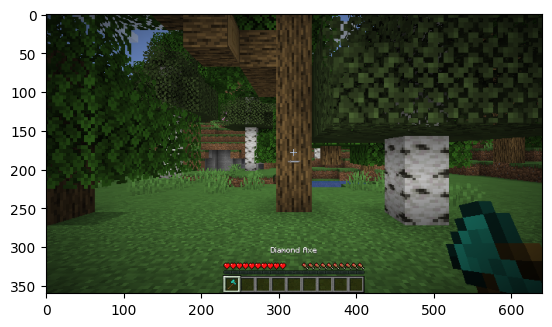

In [20]:
import matplotlib.pyplot as plt
plt.imshow(all_obs[0].astype(np.uint8))